In [1]:
import numpy as np
import qutip as qu
from error_estimation import single_generate_mse
from functools import partial

In [2]:
# dimension = 2
# epsilon = 0.0001
n_matrices = 10000
max_dimension =6

epsilons = [1E-2/10**i for i in range(7)]
dimensions = np.arange(2, max_dimension+1)


In [3]:
epsilons
dimensions

array([2, 3, 4, 5, 6])

In [44]:
dimension = 3
all_matrices = [qu.rand_dm(dimension).purity() for _ in range(10000)]
# traces2 = [np.trace(matrix@matrix) for matrix in all_matrices]

# print(np.real(np.linalg.eig(qu.rand_dm(dimension))[0]))
# print(np.trace())


Text(0.5, 1.0, 'Purity of 10000 matrices created with qu.rand_dm with density=0.75')

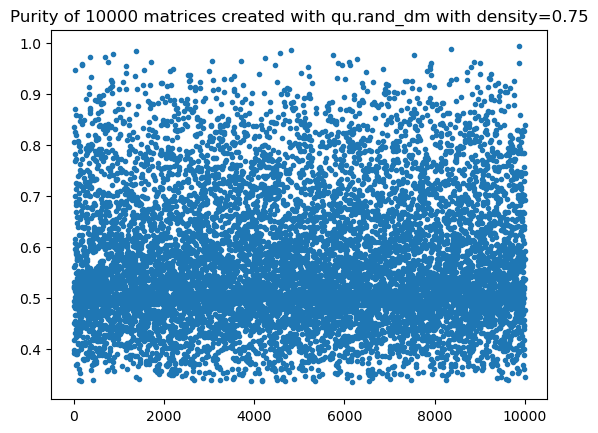

In [47]:
import matplotlib.pyplot as plt 
plt.plot(all_matrices, '.')
plt.title("Purity of 10000 matrices created with qu.rand_dm with density=0.75")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bb2df0340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bb2df0d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bb2df0670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bb2d57610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bb2d571c0>],
 'means': []}

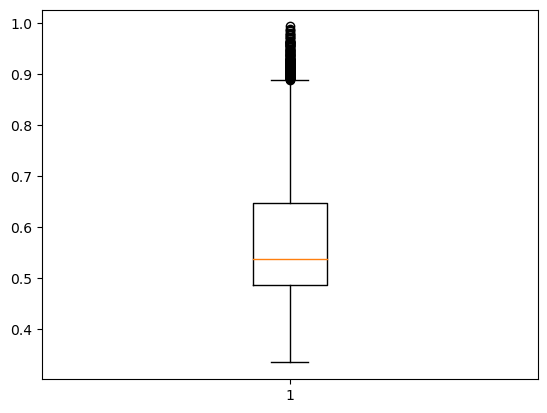

In [53]:
plt.boxplot(all_matrices)

In [81]:
rng = np.random.default_rng(1)
possible_ranks = np.arange(1+1, dimension+1)
# all_matrices_ginibre =  [qu.rand_dm_ginibre(N=dimension, rank=rng.choice(possible_ranks)).purity() for _ in range(10000)] 

all_matrices_ginibre =  [qu.rand_dm_ginibre(N=dimension, rank=None).purity() for _ in range(10000)] 

In [77]:
possible_ranks

array([2, 3])

In [7]:
# rhos = [[qu.rand_dm(d)[:] for _ in range(n_matrices)]for d in dimensions]

In [82]:
import pandas as pd
df=pd.DataFrame({'rand_dm': all_matrices, 'rand_dm_ginibre': all_matrices_ginibre})

[]

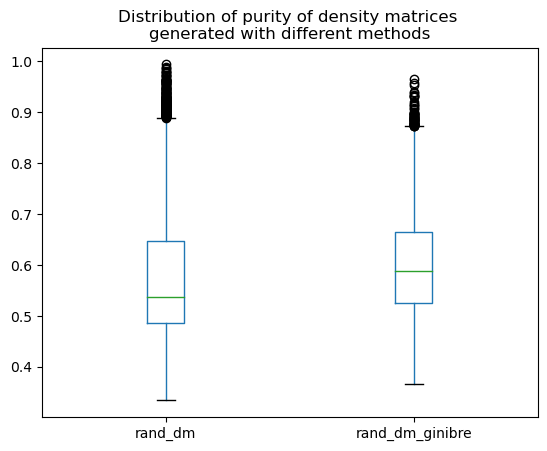

In [85]:
df.boxplot(grid=False)
plt.title("Distribution of purity of density matrices \ngenerated with different methods")
plt.plot()

[]

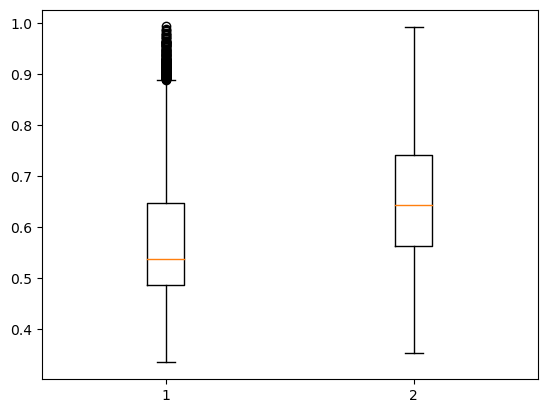

In [73]:
plt.boxplot([all_matrices, all_matrices_ginibre])
plt.plot()

In [4]:
solutions_diff_dimensions = []
for dimension in dimensions:
    solutions_per_eps_same_dim=[]
    for epsilon in epsilons:
        print(f"Dim: {dimension}, Eps: {epsilon}")
        partial_mse = partial(
            single_generate_mse, epsilon=epsilon, dimension=dimension
        )
        rhos = [qu.rand_dm(dimension)[:] for _ in range(n_matrices)]
        mse_list_over_rhos = qu.parallel.parfor(partial_mse, rhos)
        solutions_per_eps_same_dim.append(mse_list_over_rhos)
    solutions_diff_dimensions.append(solutions_per_eps_same_dim)


Dim: 2, Eps: 0.01
Dim: 2, Eps: 0.001
Dim: 2, Eps: 0.0001
Dim: 2, Eps: 1e-05
Dim: 2, Eps: 1e-06
Dim: 2, Eps: 1e-07
Dim: 2, Eps: 1e-08
Dim: 3, Eps: 0.01
Dim: 3, Eps: 0.001
Dim: 3, Eps: 0.0001
Dim: 3, Eps: 1e-05
Dim: 3, Eps: 1e-06
Dim: 3, Eps: 1e-07
Dim: 3, Eps: 1e-08
Dim: 4, Eps: 0.01
Dim: 4, Eps: 0.001
Dim: 4, Eps: 0.0001
Dim: 4, Eps: 1e-05
Dim: 4, Eps: 1e-06
Dim: 4, Eps: 1e-07
Dim: 4, Eps: 1e-08
Dim: 5, Eps: 0.01
Dim: 5, Eps: 0.001
Dim: 5, Eps: 0.0001
Dim: 5, Eps: 1e-05
Dim: 5, Eps: 1e-06
Dim: 5, Eps: 1e-07
Dim: 5, Eps: 1e-08
Dim: 6, Eps: 0.01
Dim: 6, Eps: 0.001
Dim: 6, Eps: 0.0001
Dim: 6, Eps: 1e-05
Dim: 6, Eps: 1e-06
Dim: 6, Eps: 1e-07
Dim: 6, Eps: 1e-08


In [5]:
import joblib

joblib.dump(solutions_diff_dimensions, "results_aggregated_mse_10000.job")

['results_aggregated_mse_10000.job']

In [6]:
len(solutions_diff_dimensions)


5

## Dimension 2

In [3]:
import joblib
solutions_diff_dimensions = joblib.load("results_aggregated_mse_10000.job")

(5, 35, 1000)

(5, 7, 1000)

In [4]:
np.array(solutions_diff_dimensions).shape

(5, 7, 10000)

In [5]:
mse_list = solutions_diff_dimensions[0]


In [6]:
np.array(mse_list).shape

(7, 10000)

In [7]:
all_data_array = np.array(solutions_diff_dimensions)

In [8]:
mus = np.mean(all_data_array, axis=2)
stds = np.std(all_data_array, axis=2)

In [9]:
mus.shape

(5, 7)

In [10]:
import matplotlib.pyplot as plt

[]

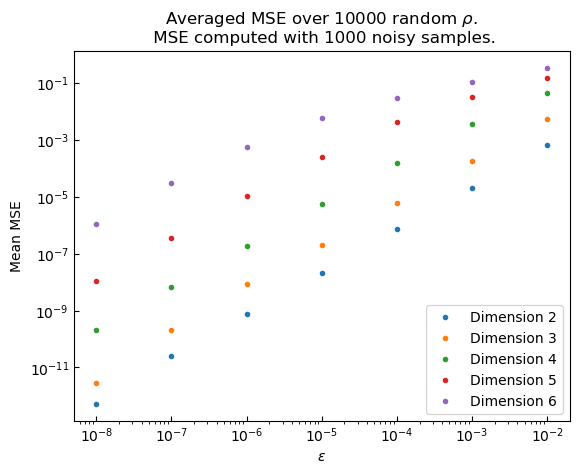

In [23]:
plt.style.use('default')
for i in range(mus.shape[0]):
    dimension = dimensions[i]
    # plt.errorbar(epsilons, mus[i, :],yerr=stds[i, :] , marker = 'o',   label=f'Dimension {dimension}')
    plt.plot(epsilons, mus[i, :], '.', label=f'Dimension {dimension}')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(f'Mean MSE')
plt.title('Averaged MSE over 10000 random '+r'$\rho$' +".\n MSE computed with 1000 noisy samples.")
plt.tick_params(direction="in")
plt.plot()